In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_car=pd.read_csv('car.csv',sep=',')

In [3]:
data_car.iloc[3][3],type(data_car.iloc[3][3])

('2', str)

In [4]:
#data_car.describe()

In [5]:
pd.read_csv('car.csv',sep=',')

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [6]:
#data_car.head(-10)

In [7]:
data_car.rename(columns={'vhigh': 'buying','vhigh.1':'maint','2':'doors','2.1':'persons','small':'lug_boot','low':'safety','unacc':'value'}, inplace=True)

In [8]:
data_car.describe()

,buying,maint,doors,persons,lug_boot,safety,value
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


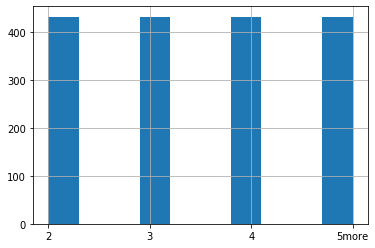

In [9]:
data_car['doors'].hist()

In [10]:
y = data_car['value'].values
type(y)

numpy.ndarray

In [11]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder

In [12]:
car_num=data_car[['doors','persons']]

In [13]:
car_num_np=car_num.values

In [14]:
car_cat=data_car.drop(['doors','persons','value'],axis=1)

In [15]:
car_cat.describe()

,buying,maint,lug_boot,safety
count,1727,1727,1727,1727
unique,4,4,3,3
top,high,high,big,high
freq,432,432,576,576


In [16]:
ordinal_encoder = OrdinalEncoder()
car_cat_encoded = ordinal_encoder.fit_transform(car_cat)
car_cat_encoded[:10]

array([[3., 3., 2., 2.],
       [3., 3., 2., 0.],
       [3., 3., 1., 1.],
       [3., 3., 1., 2.],
       [3., 3., 1., 0.],
       [3., 3., 0., 1.],
       [3., 3., 0., 2.],
       [3., 3., 0., 0.],
       [3., 3., 2., 1.],
       [3., 3., 2., 2.]])

In [17]:
data_cat_np=data_car[['buying','maint','lug_boot','safety']].values

In [18]:
len(data_cat_np), data_cat_np.shape

(1727, (1727, 4))

In [19]:
def MaFunctionOrdinal(data):
    nbl,nbc=data.shape
    for i in range(0,nbl):
        for j in range (0,nbc):
            if data[i][j]=='5more'or data[i][j]=='more':
                data[i][j]=5
            elif data[i][j]=='4':
                data[i][j]=4
            elif data[i][j]=='vhigh' or data[i][j]=='3':
                data[i][j]=3
            elif data[i][j]=='high' or data[i][j]=='big' or data[i][j]=='2' :
                data[i][j]=2
            elif data[i][j]=='med':
                data[i][j]=1
            elif data[i][j]=='low' or data[i][j]=='small':
                data[i][j]=0
                
    return data
            
    

In [20]:
MaFunctionOrdinal(data_cat_np)

array([[3, 3, 0, 1],
       [3, 3, 0, 2],
       [3, 3, 1, 0],
       ...,
       [0, 0, 2, 0],
       [0, 0, 2, 1],
       [0, 0, 2, 2]], dtype=object)

In [21]:
data_cat_trans_np=MaFunctionOrdinal(data_cat_np)

In [22]:
data_num_trans_np=MaFunctionOrdinal(car_num_np)

In [23]:
data_num_trans_np

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [5, 5],
       [5, 5],
       [5, 5]], dtype=object)

In [24]:
data_trans_np=np.concatenate((data_cat_trans_np,data_num_trans_np),axis=1)

In [25]:
#data_car[['buying','maint','lug_boot','safety']][:10]

In [26]:
#ordinal_encoder.get_params(deep=False)

In [27]:
#car_cat_data.index

In [28]:
#ordinal_encoder.categories_

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()

In [31]:
data_trans_np=scaler.fit_transform(data_trans_np)

In [32]:
data_trans_frame=pd.DataFrame(data_trans_np)

In [33]:
data_trans_frame.describe()

,0,1,2,3,4,5
count,1.727000e+03,1.727000e+03,1.727000e+03,1.727000e+03,1.727000e+03,1.727000e+03
mean,-6.026447e-15,2.794908e-15,-5.322899e-17,-3.857173e-18,5.047754e-16,2.314304e-18
std,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00,1.000290e+00
min,-1.341175e+00,-1.341175e+00,-1.225632e+00,-1.225632e+00,-1.342729e+00,-1.337385e+00
25%,-8.938577e-01,-8.938577e-01,-1.225632e+00,-1.225632e+00,-4.480944e-01,-1.337385e+00
50%,-4.465403e-01,-4.465403e-01,-7.092777e-04,-7.092777e-04,4.465403e-01,2.665482e-01
75%,4.480944e-01,4.480944e-01,1.224213e+00,1.224213e+00,8.938577e-01,1.068515e+00
max,1.342729e+00,1.342729e+00,1.224213e+00,1.224213e+00,1.341175e+00,1.068515e+00


In [34]:
data_trans_frame.rename(columns={0: 'buying',1:'maint',4:'doors',5:'persons',2:'lug_boot',3:'safety'}, inplace=True)

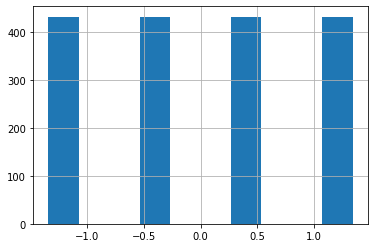

In [35]:
data_trans_frame['doors'].hist()

In [36]:
data_trans_frame['doors'].mean()

5.047754018156763e-16

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
final_data_car=pd.concat([data_trans_frame, data_car['value']], axis=1)

In [39]:
final_data_car.head(10)

,buying,maint,lug_boot,safety,doors,persons,value
0,1.342729,1.342729,-1.225632,-0.000709,-1.342729,-1.337385,unacc
1,1.342729,1.342729,-1.225632,1.224213,-1.342729,-1.337385,unacc
2,1.342729,1.342729,-0.000709,-1.225632,-1.342729,-1.337385,unacc
3,1.342729,1.342729,-0.000709,-0.000709,-1.342729,-1.337385,unacc
4,1.342729,1.342729,-0.000709,1.224213,-1.342729,-1.337385,unacc
5,1.342729,1.342729,1.224213,-1.225632,-1.342729,-1.337385,unacc
6,1.342729,1.342729,1.224213,-0.000709,-1.342729,-1.337385,unacc
7,1.342729,1.342729,1.224213,1.224213,-1.342729,-1.337385,unacc
8,1.342729,1.342729,-1.225632,-1.225632,-1.342729,0.266548,unacc
9,1.342729,1.342729,-1.225632,-0.000709,-1.342729,0.266548,unacc


In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_trans_frame , data_car['value'], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(car_1hot , data_car['value'], test_size=0.2, random_state=42)
type(X_train)

pandas.core.frame.DataFrame

In [41]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_train_reduc=pca.fit_transform(X_train)

In [42]:
np.sum(pca.explained_variance_ratio_)

0.34530692941172764

In [43]:
pca.explained_variance_ratio_[0], pca.explained_variance_ratio_[1]


(0.17295182583176455, 0.1723551035799631)

In [44]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="liblinear", random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
log_reg.score(X_train, y_train)

0.8153511947863866

In [46]:
log_reg.score(X_test, y_test)

0.791907514450867

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [3, 4, 5, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
param_grid_1hot = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [3, 6, 12, 21]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [3, 9, 17]},
  ]
forest_reg = RandomForestClassifier(random_state=13)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
#grid_search = GridSearchCV(forest_reg, param_grid_1hot, cv=5, return_train_score=True)
#grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=13,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{

In [48]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [49]:
final_model = grid_search.best_estimator_

In [50]:
final_model.score(X_train,y_train)

1.0

In [51]:
final_model.score(X_test,y_test)

0.9710982658959537

In [52]:
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder

In [53]:
data_car_var=data_car.drop(['value'],axis=1)
data_car_var

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [54]:
cat_encoder = OneHotEncoder()
car_1hot = cat_encoder.fit_transform(data_car_var)
car_1hot

<1727x21 sparse matrix of type '<class 'numpy.float64'>'
	with 10362 stored elements in Compressed Sparse Row format>